In [126]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [55]:
UA = gpd.read_file("Data/Current_UA/Current_UA.shp")
glasgow_simd = gpd.read_file("Data/Glasgow_simd/Glasgow_simd.shp")
simd_pop = pd.read_csv("Data/simd2020_withinds.csv")
vacant_land = gpd.read_file("Data/VDL_centroids/VDL_centroids.shp")
vacant_land_poly = gpd.read_file("Data/VDL/Vacant_Derelict_Land.shp")

In [56]:
e_food_table = pd.read_csv("Data/efdi_scotland.csv")

In [57]:
glasgow_simd = glasgow_simd.merge(e_food_table,left_on="DataZone",right_on="LSOA or DZ")

In [58]:
cost_matrix_dz_ua = np.load("cost_matrix_dz_ua.npy")
cost_matrix_dz_vdl = np.load("cost_matrix_dz_vdl.npy")

### Define poor access as > 10min walking

In [59]:
poor_acc_dz = glasgow_simd.iloc[cost_matrix_dz_ua.min(axis=1)>600,:]
poor_acc_dz.reset_index(inplace=True)

cost_matrix_poor_dz_vdl = cost_matrix_dz_vdl[cost_matrix_dz_ua.min(axis=1)>600,:]

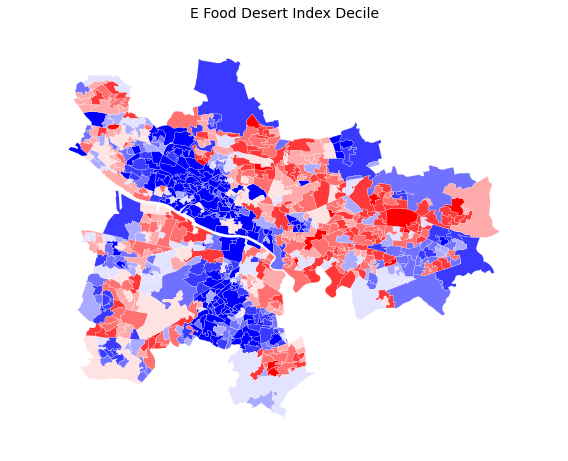

In [167]:
cmap=plt.cm.get_cmap("bwr_r",10)

ax=glasgow_simd.plot(column='Decile',cmap=cmap,figsize=(8,8),linewidth=0.2, edgecolor='white')
vacant_land_poly.plot(ax=ax,color='black',legend=True,alpha=0)
UA.plot(ax=ax,color='green',legend=True,alpha=0)

plt.xticks([]) #remove grid ticks
plt.yticks([]) #remove grid ticks
plt.box() #remove the box
plt.tight_layout()
plt.title("E Food Desert Index Decile",fontsize=14)

plt.savefig("food_decile_map.png",dpi=300)

In [139]:
glasgow_simd['Total_popu']/glasgow_simd.geometry.area/1000/1000

0      7.950026e-09
1      6.319277e-09
2      2.563600e-09
3      5.420366e-09
4      7.848062e-09
           ...     
741    3.012963e-09
742    4.681566e-09
743    4.785522e-09
744    3.338522e-09
745    3.164455e-09
Length: 746, dtype: float64

In [130]:
glasgow_simd['pop_den'] = glasgow_simd['Total_popu']/(glasgow_simd.geometry.area/1000/1000)/1000

In [131]:
norm

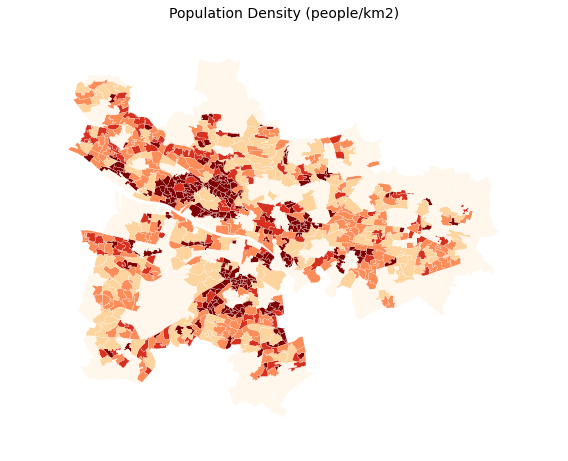

In [168]:
cmap=plt.cm.get_cmap('OrRd',5)

ax=glasgow_simd.plot(column='pop_den',figsize=(8,8),linewidth=0.2, edgecolor='white',
                     vmax=10,cmap=cmap)

UA.plot(ax=ax,color='green',legend=True,alpha=0)
vacant_land_poly.plot(ax=ax,color='black',legend=True,alpha=0)

plt.xticks([]) #remove grid ticks
plt.yticks([]) #remove grid ticks
plt.box() #remove the box
plt.tight_layout()
plt.title("Population Density (people/km2)",fontsize=14)

plt.savefig("pop_dne.png",dpi=300)

(array([337., 265.,  73.,  45.,  17.,   5.,   1.,   2.,   0.,   1.]),
 array([    0.        ,  5238.94728096, 10477.89456193, 15716.84184289,
        20955.78912385, 26194.73640482, 31433.68368578, 36672.63096674,
        41911.5782477 , 47150.52552867, 52389.47280963]),
 <BarContainer object of 10 artists>)

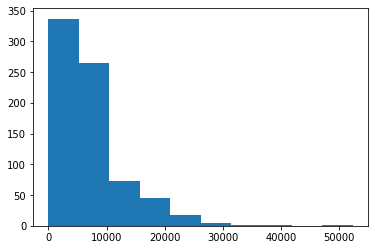

In [115]:
plt.hist(glasgow_simd.pop_den)

In [73]:
good_acc_dz = glasgow_simd.iloc[cost_matrix_dz_ua.min(axis=1)<=600,:]

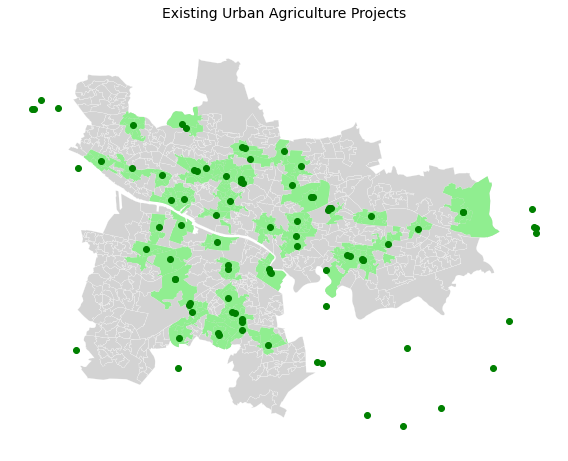

In [169]:
ax=glasgow_simd.plot(figsize=(8,8),color="lightgrey",linewidth=0.2, edgecolor='white')
vacant_land_poly.plot(ax=ax,color='black',legend=True,alpha=0)

good_acc_dz.plot(ax=ax,color='lightgreen')

UA.plot(ax=ax,color='green',legend=True)

plt.xticks([])
plt.yticks([])
plt.box()
plt.tight_layout()

plt.title("Existing Urban Agriculture Projects",fontsize=14)

plt.savefig("UA.png",dpi=300)

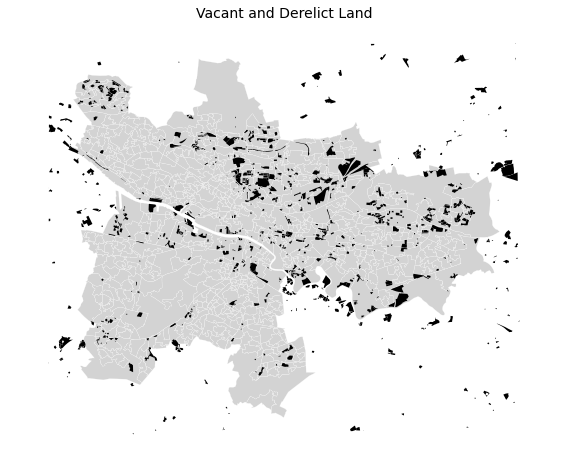

In [170]:
ax=glasgow_simd.plot(figsize=(8,8),color="lightgrey",linewidth=0.2, edgecolor='white')
vacant_land_poly.plot(ax=ax,color='black',legend=True)
UA.plot(ax=ax,color='green',legend=True,alpha=0)

plt.xticks([])
plt.yticks([])
plt.box()
plt.tight_layout()

plt.title("Vacant and Derelict Land",fontsize=14)
plt.savefig("VLD.png",dpi=300)

In [90]:
new_ua = [73, 109, 128, 165, 185, 203, 248, 254, 301, 394, 397, 512, 588, 650, 707]

In [91]:
new_dz = [ 49,  50,  55,  98,  99, 100, 139, 144, 218, 219, 222, 223, 228,
       229, 234, 244, 254, 255, 256, 263, 267, 268, 269, 272, 276, 277,
       281, 285, 286, 287, 288, 289, 292, 293, 294, 295, 310, 328, 331,
       332, 334, 335, 336, 343, 374, 375, 391, 392, 393, 397, 400, 408,
       409, 410, 411, 412, 419, 420, 509, 513, 514, 517, 520, 524, 526,
       594, 595, 596, 597, 598, 599, 601, 602, 603, 626, 682, 683, 686,
       687, 688, 690, 708, 710, 711, 714, 715, 716, 717, 731, 738, 741,
       742, 743, 745]

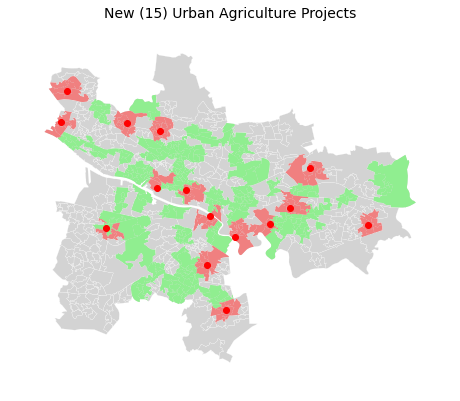

In [93]:
ax=glasgow_simd.plot(figsize=(8,8),color="lightgrey",linewidth=0.2, edgecolor='white')
vacant_land_poly.plot(ax=ax,color='black',legend=True,alpha=0)
good_acc_dz.plot(ax=ax,color='lightgreen')

glasgow_simd.iloc[new_dz,:].plot(ax=ax,color="lightcoral")
vacant_land.iloc[new_ua,:].plot(ax=ax,color="red")

plt.xticks([])
plt.yticks([])
plt.box()

plt.title("New (20) Urban Agriculture Projects",fontsize=14)

plt.savefig("New_UA_15.png",dpi=300)

Text(0.5, 1.0, 'Population Density (people/km2)')

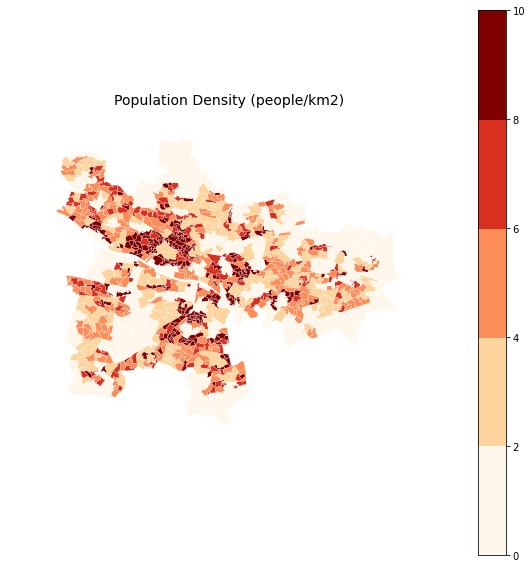

In [171]:
cmap=plt.cm.get_cmap('OrRd',5)

ax=glasgow_simd.plot(column='pop_den',figsize=(8,8),linewidth=0.2, edgecolor='white',
                     vmax=10,cmap=cmap,legend=True)

UA.plot(ax=ax,color='green',legend=True,alpha=0)
vacant_land_poly.plot(ax=ax,color='black',legend=True,alpha=0)

plt.xticks([]) #remove grid ticks
plt.yticks([]) #remove grid ticks
plt.box() #remove the box
plt.tight_layout()
plt.title("Population Density (people/km2)",fontsize=14)

#plt.savefig("pop_dne.png",dpi=300)

Text(0.5, 1.0, 'E Food Desert Index Decile')

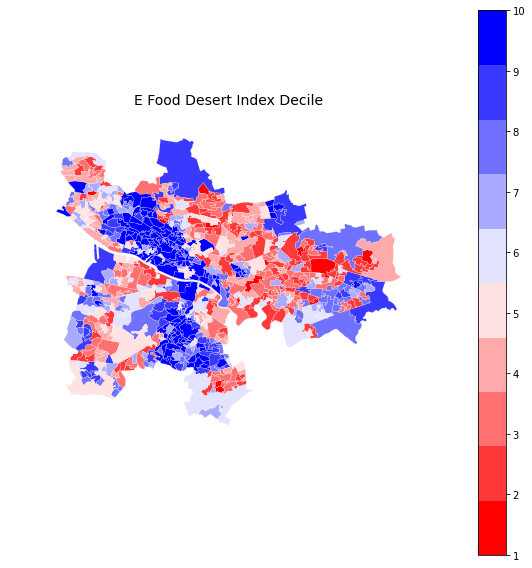

In [176]:
cmap=plt.cm.get_cmap("bwr_r",10)

ax=glasgow_simd.plot(column='Decile',cmap=cmap,figsize=(8,8),linewidth=0.2, edgecolor='white',legend=True)
vacant_land_poly.plot(ax=ax,color='black',legend=True,alpha=0)
UA.plot(ax=ax,color='green',legend=True,alpha=0)

plt.xticks([]) #remove grid ticks
plt.yticks([]) #remove grid ticks
plt.box() #remove the box
plt.tight_layout()
plt.title("E Food Desert Index Decile",fontsize=14)
